In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [29]:
location = "Silver Jack"

obs_fp = Path({
    "Morrow Point": "../data/obs_data/ResOpsUS_542.csv",
    "Blue Mesa": "../data/obs_data/ResOpsUS_541.csv",
    "Silver Jack": "../data/obs_data/ResOpsUS_549.csv",
    "Taylor Park": "../data/obs_data/ResOpsUS_536.csv",
}[location])

inflow_fp = Path({
    "Morrow Point": "../data/colorado/basins/gunnison/final_outputs/inflow/Morrow_Point.csv",
    "Blue Mesa": "../data/colorado/basins/gunnison/final_outputs/inflow/Blue_Mesa.csv",
    "Silver Jack": "../data/colorado/basins/gunnison/final_outputs/inflow/Silver_Jack.csv",
    "Taylor Park": "../data/colorado/basins/gunnison/final_outputs/inflow/Taylor_Park.csv",
}[location])

outflow_fp = Path({
    "Morrow Point": "../data/colorado/basins/gunnison/final_outputs/outflow/Morrow_Point.csv",
    "Blue Mesa": "../data/colorado/basins/gunnison/final_outputs/outflow/Blue_Mesa.csv",
    "Silver Jack": "../data/colorado/basins/gunnison/final_outputs/outflow/Silver_Jack.csv",
    "Taylor Park": "../data/colorado/basins/gunnison/final_outputs/outflow/Taylor_Park.csv",
}[location])

dels_fp = Path({
    "Morrow Point": "../data/colorado/basins/gunnison/final_outputs/dels/Morrow_Point.csv",
    "Blue Mesa": "../data/colorado/basins/gunnison/final_outputs/dels/Blue_Mesa.csv",
    "Silver Jack": "../data/colorado/basins/gunnison/final_outputs/dels/Silver_Jack.csv",
    "Taylor Park": "../data/colorado/basins/gunnison/final_outputs/dels/Taylor_Park.csv",
}[location])

sarea_fp = Path({
    "Morrow Point": "../data/colorado/basins/gunnison/final_outputs/sarea_tmsos/Morrow_Point.csv",
    "Blue Mesa": "../data/colorado/basins/gunnison/final_outputs/sarea_tmsos/Blue_Mesa.csv",
    "Silver Jack": "../data/colorado/basins/gunnison/final_outputs/sarea_tmsos/Silver_Jack.csv",
    "Taylor Park": "../data/colorado/basins/gunnison/final_outputs/sarea_tmsos/Taylor_Park.csv",
}[location])

In [30]:
# read observed inflow
obs = pd.read_csv(obs_fp, parse_dates=['date']).set_index('date')
print(obs.head())

# read inflow
inflow = pd.read_csv(inflow_fp, index_col=0, parse_dates=['date'])
# print(inflow.head())

# read sarea
sarea = pd.read_csv(sarea_fp, index_col=0, parse_dates=['date'])
# print(sarea.head())

# read dels
dels = pd.read_csv(dels_fp, index_col=0, parse_dates=['date'])
# print(dels.head())

# read outflow
outflow = pd.read_csv(outflow_fp, index_col=0, parse_dates=['date'])
# print(outflow.head())

            storage  inflow  outflow  elevation  evaporation
date                                                        
1962-10-01      NaN     NaN      NaN        NaN          NaN
1962-10-02      NaN     NaN      NaN        NaN          NaN
1962-10-03      NaN     NaN      NaN        NaN          NaN
1962-10-04      NaN     NaN      NaN        NaN          NaN
1962-10-05      NaN     NaN      NaN        NaN          NaN


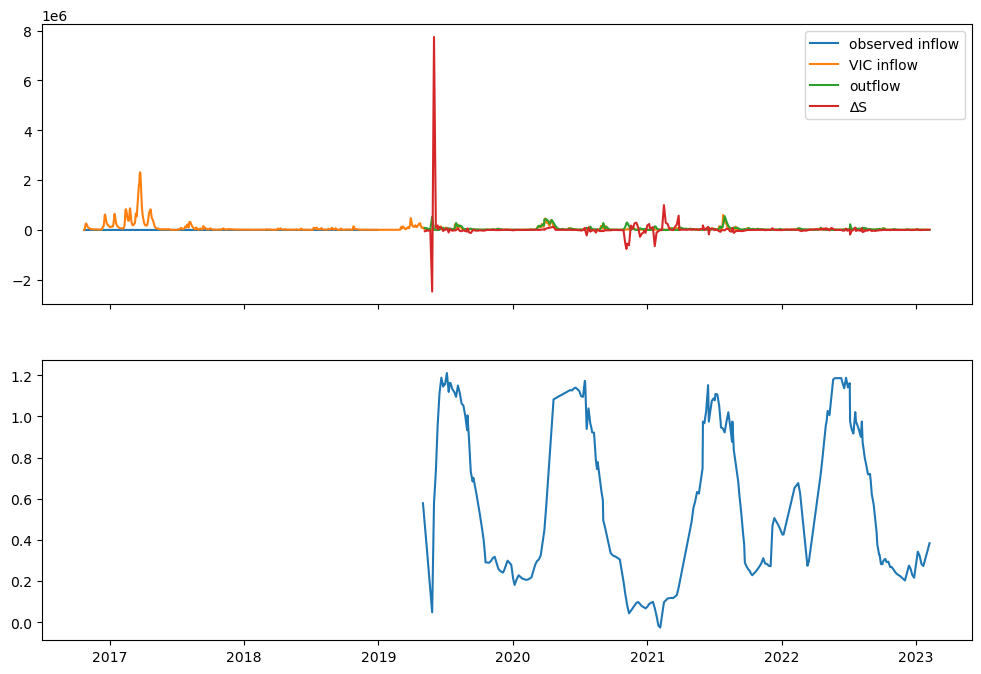

In [35]:
# Visualize
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Inflow
ax1.plot(obs.loc[inflow.index.to_series().min():inflow.index.to_series().max(), "inflow"], label="observed inflow")
ax1.plot(inflow.index, inflow['inflow (m3/d)'], label='VIC inflow')
ax1.plot(outflow.index, outflow['outflow (m3/d)'], label='outflow')
ax1.plot(dels.index, dels['dS (m3)'], label='∆S')

ax2.plot(sarea.index, sarea['area (km2)'], label='sarea')

ax1.legend()

The anomalous precipitation related issue seems to be having an affect here - this should've been resolved by the code, but maybe it got missplaced during merging of code bases.

(array([199778.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    801.]),
 array([2.00000003e-01, 3.00180000e+02, 6.00160000e+02, 9.00140000e+02,
        1.20012000e+03, 1.50010000e+03, 1.80008000e+03, 2.10006000e+03,
        2.40004000e+03, 2.70002000e+03, 3.00000000e+03]),
 <BarContainer object of 10 artists>)

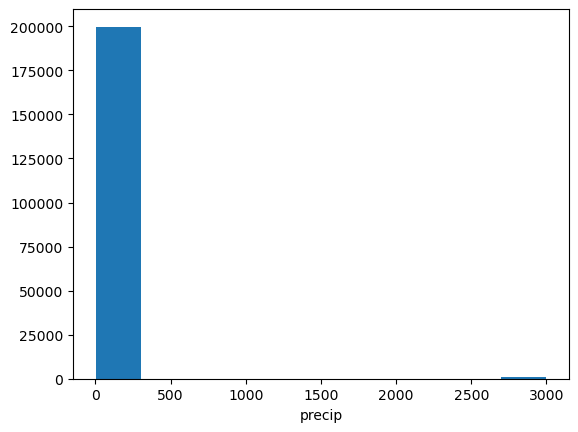

In [80]:
# see if the issue is with the precipitation.
import xarray as xr
import numpy as np


combined_data_fp = "../data/colorado/basins/gunnison/pre_processing/nc/combined_data.nc"

combined_data = xr.open_dataset(combined_data_fp)
combined_data['precip'].where(combined_data['precip'] > 0).plot()

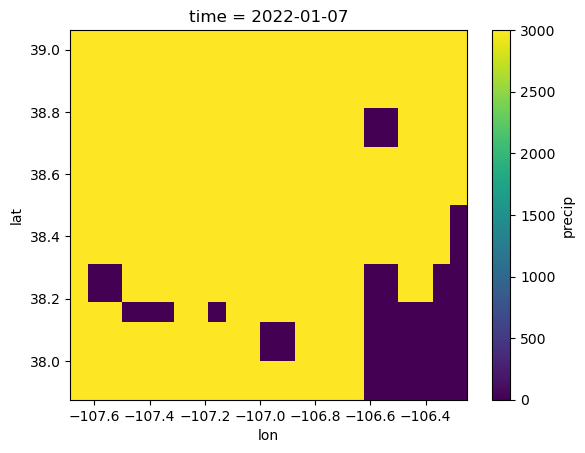

In [82]:
combined_data['precip'].sel(time="2022-01-07").plot()